Project: Cyber Security Attack Type Detection 

Preliminary EDA

This notebook contains an initial exploratory data analysis (EDA) of the raw cybersecurity attack dataset (25 metrics, ~40,000 rows). 
The data has not yet been cleaned, so this analysis provides a high-level overview of attack patterns (e.g., attack types versus ports 
and severity) and highlights early feature and modeling considerations, while also highlighting data quality signals that may require 
attention from the DE team. Analysis will be refined once the cleaned dataset is provided by the DE team.

In [3]:
# 0. Import essential libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   


In [4]:
# 1. Load the CSV file
file_path = r"C:\Users\lina_\OneDrive - DSTI School of Engineering\PYTHON GROUP PROJECT\cybersecurity_attacks.csv"
df = pd.read_csv(file_path)


In [6]:
#  2.1 Dataset overview - the dataset looks as expected
df.head() 

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [8]:
#  2.2 Dataset overview 2 - 40000 rows and 25 columns as expected
df.shape

(40000, 25)

In [9]:
#  2.3 Dataset overview 3 - distinct values per column
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [42]:
# 3.1 Missing value analysis 1 - missing values per column
# Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts 

df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [13]:
# 3.2 Missing value analysis - the percentage of missing values per column
# The percentage of missing values for the indicated columns are significant at around 50 %
df.isnull().mean() * 100


Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

3.1 - 3.2 Missing value analysis 
Columns with missing values: Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts. 
These columns all represent outputs from security or monitoring systems and are only populated when a detection, alert, or log entry exists. Their high and similar missing rates likely indicate periods with no triggered events rather than data quality errors, to be investigated.

- Missing values here likely mean “no alert/log generated”, not “data lost”
- They should not be treated the same as missing numeric fields
- For modeling, missingness itself could potentially be informative (e.g., alert present vs not)

In [14]:
# 4.1 Duplicate records - there are e 0 duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

In [15]:
# 5.1 Basic statistics (Safe, High-Level)
# Ports are widely distributed, likely reflecting various services.
# There’s a mix of small and large packets.
# Varied spread of anomaly scores.
    
df.describe()


,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [17]:
# 5.2 Basic statistics - count low, medium, high anomaly scores:
# Most of the data, around 75%, is medium or high anomaly, representing suspicious or attack-like traffic. Only 25% of the traffic is likely normal.

print((df['Anomaly Scores'] < 25).sum(), "low")
print(((df['Anomaly Scores'] >= 25) & (df['Anomaly Scores'] <= 75)).sum(), "medium")
print((df['Anomaly Scores'] > 75).sum(), "high")

9945 low
20044 medium
10011 high


In [18]:
# 5.3 Basic statistics - distribution and variety of categories
df.describe(include="object")

,Timestamp,Source IP Address,Destination IP Address,Protocol,Packet Type,Traffic Type,Payload Data,Malware Indicators,Alerts/Warnings,Attack Type,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000,40000,40000,40000,20000,19933,40000,...,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,3,2,3,40000,1,1,3,...,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,ICMP,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,Alert Triggered,DDoS,...,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,13429,20237,13376,1,20000,19933,13428,...,13529,13435,6,35,13408,16,2,20039,19950,20116


In [19]:
# 5.4 Basic statistics - all traffic types 
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

5.1 - 5.4 Basic statistics analysis

Two additional columns with missing values: User Information and Device Information.
Attack Type: 
    - Dominant: DDoS (13,428 occurrences): shows a repeated attack pattern. 
    - Two other attack types exits: Malware and Intrusion, they are less frequent but still relevant for analysis. 
Protocol 
    - ICMP dominates (13,429 records): ICMP is used for network-level communication rather than application or service traffic. Its high frequency suggests that a large portion of the dataset reflects low-level network activity, such as connectivity or status checks, which could include suspicious or attack-like behavior.
    - TCP and UDP are also present: These protocols describe how traffic is transported, while Traffic Type (DNS, HTTP, FTP) describes the service. Observing Protocol together with Traffic Type helps distinguish transport behavior (TCP vs UDP) from service behavior (DNS vs HTTP vs FTP), which may indicate patterns associated with attacks and may be useful for deeper analysis.
Packet Type & Traffic Type 
    - Packet Type Control dominates (20,237): network control traffic heavily represented, rather than user-generated content.
    - Traffic Type top is DNS (13,376): may indicate DNS-focused attacks. 
Malware Indicators & Alerts/Warnings 
    - Missing values are significant: affects feature engineering. 
    - IoC Detected or Alert Triggered appears in non-missing rows, signaling attacks in the dataset. 
Source / Destination IP 
    - Almost every row unique: this could later be used for clustering or mapping attacks, for example, by subnet, geographic region, or 
    identifying repeated sources.
Payload Data, User Information, Device Information, Geo-location Data 
    - Mostly unique / free-text: limited direct statistical summarization, but could be valuable for detailed investigation, e.g., tracing specific attacks or user/device patterns.
    - Missing values notable in User and Device Information: may influence further data processing or modeling.
    - Geo-location may be sparse, but could help identify geographic patterns of attacks. 
Severity Level 
    - Medium most frequent, followed by High: aligns with anomaly score distribution. 
    - Can be used to prioritize analysis or visualization by impact.

In [21]:
# 6.1 High-level categorical exploration
df['Attack Type'].value_counts()


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [22]:
# 6.2 High-level categorical exploration
# It confirms that the dataset has mostly ICMP traffic (network-level activity) and a similar amount of TCP/UDP traffic (service-related activity like DNS, HTTP, FTP).
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [25]:
# 6.3 Attack types
df['Attack Type'].head(10)


0      Malware
1      Malware
2         DDoS
3      Malware
4         DDoS
5      Malware
6         DDoS
7    Intrusion
8    Intrusion
9      Malware
Name: Attack Type, dtype: object

In [26]:
# 6.4 Missing attack types - none
df['Attack Type'].isnull().sum()

np.int64(0)

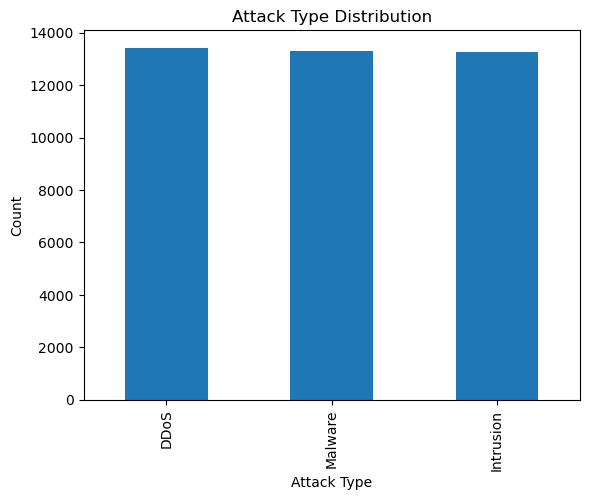

In [28]:
# 6.5 Attack type distribution
attack_counts = df['Attack Type'].value_counts()
attack_counts.plot(kind='bar')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

6.1 - 6.6 Attack type analysis

The dataset contains three identified attack types: DDoS, Malware, and Intrusion.
Each attack type appears with a similar number of records (approximately one third of the dataset each).
At this point, no additional attack types are visible in the raw data. If other attack categories exist, they may only emerge after data cleaning, re-labeling, or feature engineering, which will be handled in later stages by the DE and DS.

Based on the observed counts, there is no strong class imbalance among the identified attack types at this stage, as no single class dominates the dataset.
- DDoS ≈ 13.4k
- Malware ≈ 13.3k
- Intrusion ≈ 13.3k


Potential modeling considerations (early signals)

- Attack type distribution: Since the three attack types are similarly represented, basic classification models are unlikely to be biased toward a single class at this stage.

- Source and Destination IP addresses: Most IP values appear only once, meaning they behave as identifiers rather than reusable categories. These will likely require transformation or aggregation before being useful for modeling.

- Missing information: Malware Indicators, Alerts/Warnings, and User and Device Information contain missing values. These columns will require review and handling before they can be reliably used. 

- Free-text fields: Columns such as Payload Data, User Information, and Device Information are not directly usable for statistical modeling in their current form. However, they may be valuable later for deeper investigation, such as identifying recurring patterns or tracing specific attack behaviors.

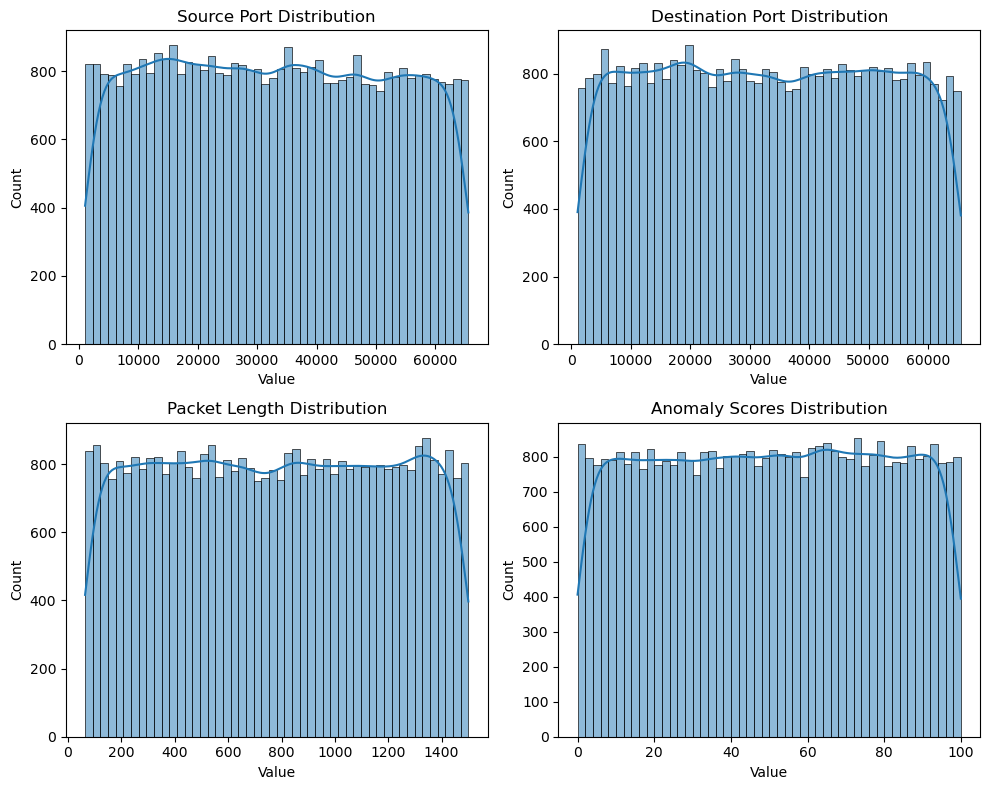

In [46]:
# 7.1 High-level numerical exploration

numeric_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()

7.1 High-level numerical exploration

Overall, no extreme skew or obvious outliers, just a few small peaks and drops within each graph. These patterns may be explored further during the detailed investigation.



In [41]:
# 8.1 Numerical feature skewness (asymmetry of the distribution)
df.skew(numeric_only=True)


Source Port         0.024472
Destination Port    0.008106
Packet Length      -0.000482
Anomaly Scores     -0.011169
dtype: float64

In [42]:
8.2 df.describe(percentiles=[0.01, 0.99])

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
1%,1623.990000,1728.970000,77.000000,0.960000
50%,32856.000000,33004.500000,782.000000,50.345000
99%,64889.020000,64853.000000,1486.000000,99.000100
max,65530.000000,65535.000000,1500.000000,100.000000


8.1-8.2  Numerical feature analysis 

The numeric feature distributions shown in the histograms align with the descriptive statistics. 
Source and destination ports, as well as packet lengths, are fairly evenly distributed with some extremes, and anomaly scores are centered around 50, reflecting a balanced mix of low, medium, and high values. 
The dataset isn’t dominated by one category of traffic, it has a mix of normal and suspicious activity (as detailed earlier with 25% low, 50% medium, 25% high).

In [11]:
# 9.1 Cross-feature sanity checks

# The distribution of Severity Level across attack types is fairly even. Each attack type has roughly the same number of High, Medium, and Low severity records. Nothing stands out at this stage—this can be explored in more detail after data cleaning and deeper analysis.
# Again, the distribution of Severity Level across attack types is fairly even. Each attack type has roughly the same number of High, Medium, and Low severity records. Nothing stands out at this stage, this can be explored in more detail after data cleaning and deeper analysis.

pd.crosstab(df['Attack Type'], df['Severity Level'])

Severity Level,High,Low,Medium
Attack Type,,,
DDoS,4523,4450,4455
Intrusion,4427,4374,4464
Malware,4432,4359,4516


In [13]:
# 9.2 Cross-tab of Protocol vs Source Port

# Sample of 20 Source Ports

pd.crosstab(df['Protocol'], df['Source Port'].head(20)) 

Source Port,4510,6131,10903,16513,16811,17245,17430,20018,24912,26562,31225,34489,35538,37918,39934,43729,47795,53471,55147,56296
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0
TCP,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1
UDP,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [17]:
# 9.3 Cross-tab of Protocol vs Destination Port

# Sample of 20 Destination Ports

pd.crosstab(df['Protocol'], df['Destination Port'].head(20))

Destination Port,5259,10845,17416,17595,17616,20396,20857,21176,26646,26783,32534,35006,35243,36817,38048,48166,50039,50583,52805,53600
Protocol,,,,,,,,,,,,,,,,,,,,
ICMP,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
TCP,1,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
UDP,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1


9.2 - 9.3 Protocol vs Source/Destination Port analysis

The cross-tab of Protocol with Source and Destination Ports can guide feature engineering by highlighting commonly used ports and potential unusual activity. Possible DS team actions include:
- Identify the most frequently used ports per protocol.
- Flag unusual or rare port usage that could indicate suspicious activity.
- Aggregate ports into categories (e.g., well-known vs high-number ports) for modeling.
- Encode protocol-port combinations numerically for machine learning features.
- Create derived features like “number of unique ports per IP” or “port usage patterns over time.”

In [25]:
# 10.1 Convert Timestamp to datetime from string, timestamp overview
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'].describe()


count                            40000
mean     2021-11-22 06:17:52.200800256
min                2020-01-01 00:43:27
25%         2020-12-12 19:56:28.500000
50%                2021-11-21 18:12:51
75%         2022-10-30 08:48:10.500000
max                2023-10-11 19:34:23
Name: Timestamp, dtype: object

10.1 Timestamp analasyis 

- Count: 40,000 rows have a timestamp, so no missing timestamps.
- Min / Max: The dataset spans from Jan 1, 2020 to Oct 11, 2023, roughly 4 years of data.
- Quartiles (25%, 50%, 75%): Half of the data is between Dec 2020 and Oct 2022, showing when most records occurred.
- Mean: The average timestamp is Nov 2021, roughly in the middle of the dataset.

More detailed analasyis could be made for: 
- For timestamp trend analysis (e.g., identifying months with unusually high attack activity)
- Detection of bursts or gaps (e.g., periods of zero traffic that might indicate logging issues), 
- Generation of time-based features for modeling (e.g., hour-of-day, day-of-week, month, or seasonal attack patterns). 
- DE may use this for feature engineering and attack pattern analysis (e.g., predicting likely attack periods or detecting abnormal bursts).

In [28]:
# 11.1 Volume & frequency patterns - Source IP Address
df['Source IP Address'].value_counts().head()

Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
Name: count, dtype: int64

In [32]:
# 11.2 Volume & frequency patterns - Source Ports
df['Source Port'].value_counts().head()

Source Port
41341    6
31656    5
8653     5
24528    5
60026    5
Name: count, dtype: int64

In [33]:
# 11.3 Volume & frequency patterns - Destination Ports
df['Destination Port'].value_counts().head()

Destination Port
34117    6
7508     6
30804    5
37248    5
57508    5
Name: count, dtype: int64

11.1-11.3 Volume & frequency patterns 

As stated before, most Source IPs appear only once, indicating high diversity and few repeated sources. A few Source/Destination Ports are used slightly more, highlighting potential points of focus for attack patterns. This helps identify “heavy hitters” versus one-off events for feature engineering or deeper investigation.

In [35]:
# 12.1 Feature stability & noise scan (standard deviation)

df.std(numeric_only=True)


Source Port         18560.425604
Destination Port    18574.668842
Packet Length         416.044192
Anomaly Scores         28.853598
dtype: float64

12.1 Feature stability & noise scan (standard deviation)

Feature variability shows that Source and Destination Ports cover a wide range of values, while Packet Length and Anomaly Scores are more tightly clustered around their means. This indicates that port features are highly variable and may need careful handling for modeling, whereas Packet Length and Anomaly Scores are relatively stable.

- Analysis to consider the distribution of attacks across ports, not just the most common ones.
- Rarely used ports could indicate stealthy or unusual attack patterns.
- For modeling, port variability may require feature engineering (e.g., grouping ports by service type or port ranges) to make patterns more meaningful.

13.1 Preliminary feature hypotheses highlights (details in the different analysis sections)

Attack Type: DDoS, Malware, Intrusion – nearly equal, rare types could appear after cleaning or re-labeling.
Protocol: ICMP, TCP, UDP, network vs service-level activity. Watch rare combinations.
Packet / Traffic Type: Control packets and DNS dominate. Check for unknown labels and rare types.
Malware Indicators / Alerts: IoC Detected / Alert Triggered signal attacks. Missing values need handling.
Source / Destination IP: Mostly unique. Useful for clustering, mapping, or subnet/geography analysis.
Source / Destination Ports: Some ports are used a lot, which could show common attack points, while rarely used ports might point to unusual or hidden activity.
Payload / User / Device / Geo: Free-text, limited direct use but could reveal patterns in final detailed investigation. Missing values require review.
Severity / Anomaly Score: Medium/high dominate, reflects suspicious traffic. Slight variations may guide prioritization.
Timestamp: Covers around 4 years, supports trend/burst detection and time-based features.
Packet Length: Packet lengths vary from small to large, which could help tell normal traffic apart from potential attacks.


14.1 Bias & coverage checks highlights (details in the different analysis sections)

Main attack types (DDoS, Malware, Intrusion) are roughly equal, rare types may appear after cleaning.
Missing values in User/Device Info and Malware Indicators could affect analysis.
Common protocols, packet types, and ports dominate, but rare values might signal unusual activity.
Most IPs are unique, showing high diversity, packet lengths and anomaly scores are fairly balanced.
Timestamps span around 4 years, making it suitable for trend analysis and time-based feature creation.

Takeaway: The dataset is generally balanced, but rare patterns, missing data, and unusual activity may require attention during modeling or deeper investigation.

15.1  Data leakage risk scan

Some columns in the dataset could reveal the attack type either directly or indirectly. If a model can use these features to “see” the answer, it may appear accurate during training but fail on new data. These potentially risky columns should be handled carefully during feature engineering to prevent data leakage, ensuring that models do not get indirect access to the target:

- IoC Detected: only has values when an attack occurs, directly signaling the target.
- Alert Triggered: similar to IoC, appears only during attacks.
- Any feature coming from the same system that defines the attack type might accidentally reveal the answer instead of helping the model learn.

17.1 Assumptions & uncertainties

- Missing values in security event columns indicate the absence of recorded information. Whether this represents “no event detected” or
  uncollected data cannot be confirmed without system documentation.
- User Information, Device Information: missing values, unclear if representative
- Payload Data: free-text, meaning and format not fully understood
- Geo-location: sparse, accuracy uncertain
- Severity Level: interpretation assumed as an impact indicator
- Anomaly Score: assumed higher values indicate suspicious activity
- IoC Detected / Alert Triggered: assumed to signal attacks
- Source / Destination IP: uniqueness treated as identifiers, may hide repeated actors
- Source / Destination Ports: wide range, unclear if certain ranges are meaningful
- Attack Type: only three identified, possible minor attack types may also exist
- Protocol / Traffic Type: some rare combinations may exist, purpose assumed from documentation
- Packet Type / Packet Length: assumed that larger packets may relate to attack traffic

Findings and recommendations (not conclusions)

- Attack types are roughly balanced: DDoS, Malware, Intrusion appear with similar counts. The current balance allows basic classification
  without strong class weighting, but be aware that additional attack types may emerge after cleaning or feature engineering, which could
  require adjusting the model or class weights.
- Source and Destination IPs are mostly unique, so they don’t provide reusable categories on their own, but they could be valuable for
  analysis if aggregated, e.g., clustering by subnet, geographic region, or repeated sources—to reveal patterns or hotspots in attacks.
- Protocol and Traffic Type patterns suggest network vs service-level activity. It could be insightful to create combined features (e.g.,
  protocol × traffic type) to capture transport vs service behavior for modeling.
- Packet Length and Anomaly Scores show a mix of normal and suspicious traffic. For modeling, consider grouping packet lengths and anomaly
  scores into ranges or rescaling them, to help the model distinguish normal from attack traffic.
- Timestamps cover around 4 years, enabling trend and time-based feature analysis. Extract time-based features such as hour, day, month, or
  season from timestamps to help the model capture temporal attack patterns.
- User Information, Device Information and Geo-location Data contain high-cardinality or free-text data, which limits direct statistical
  analysis, but can be useful when conducting a more in-depth investigation.
- Missing values in these fields require investigation, as they may reflect no event triggered, unavailable or disabled logging, data loss,
  partial ingestion, or fields that only apply to certain attack types.
    - Malware Indicators
    - Aler ts/Warnings
    - Proxy Information
    - Firewall Logs
    - IDS/IPS Alerts